### 형태소 분석기

In [1]:
# 코모란 형태소 분석기
from konlpy.tag import Komoran
komoran = Komoran()

komoran.morphs("아버지가방에들어가신다.")

E:\workspace_python\StudyML\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']

In [2]:
print(komoran.pos("아버지가방에들어가신다."))

[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')]


In [3]:
print(komoran.pos("아버지가 방에 들어가신다."))

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')]


In [4]:
print(komoran.nouns("아버지가 방에 들어가신다."))

['아버지', '방']


In [5]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()

print(okt.morphs("아버지가방에들어가신다."))
print(okt.pos("아버지가방에들어가신다."))
print(okt.nouns("아버지가방에들어가신다."))

['아버지', '가방', '에', '들어가신다', '.']
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
['아버지', '가방']


In [6]:
from konlpy.tag import Kkma
kkma = Kkma()

print(kkma.morphs("아버지가방에들어가신다."))
print(kkma.pos("아버지가방에들어가신다."))
print(kkma.nouns("아버지가방에들어가신다."))

['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN'), ('.', 'SF')]
['아버지', '아버지가방', '가방']


### 뉴스데이터 불러오기

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("naver_news_lecture.csv", encoding="ansi")

In [9]:
# 데이터의 행,렬 개수 확인
df.shape

(6481, 8)

In [10]:
df.columns.values

array(['collected_time', 'url', 'id', 'press', 'category', 'title',
       'contents', 'date'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 8 columns):
collected_time    6481 non-null object
url               6481 non-null object
id                6481 non-null object
press             6481 non-null object
category          6481 non-null object
title             6481 non-null object
contents          6481 non-null object
date              6481 non-null int64
dtypes: int64(1), object(7)
memory usage: 405.1+ KB


In [12]:
# 데이터 미리보기
df.head()

,collected_time,url,id,press,category,title,contents,date
0,2019-07-03 00:15:51,https://news.naver.com/main/read.nhn?mode=LPOD...,oid=055&aid=0000740272,SBS,속보,나이지리아 남동부서 송유관 폭발해 최소 8명 사망,서아프리카 나이지리아에서 송유관이 폭발해 최소 8명이 숨졌다고 AFP 통신이 보도했...,20190624
1,2019-07-03 00:15:53,https://news.naver.com/main/read.nhn?mode=LPOD...,oid=055&aid=0000740273,SBS,속보,'꼰대 요즘 것' 사이 동시통역자…총알받이 된 '낀 세대',"동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ①\n \n ● ...",20190624
2,2019-07-03 00:15:54,https://news.naver.com/main/read.nhn?mode=LPOD...,oid=055&aid=0000740274,SBS,속보,회사 임원도 '님' 찾아 삼만리…꼰대와 선배 사이 동상이몽,"동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ②\n \n ● ...",20190624
3,2019-07-03 00:15:55,https://news.naver.com/main/read.nhn?mode=LPOD...,oid=055&aid=0000740275,SBS,속보,"""맛이 아닌 유행 파는 시대""…세대 전쟁 속 40대의 속사정","동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ③\n \n ● ...",20190624
4,2019-07-03 00:15:56,https://news.naver.com/main/read.nhn?mode=LPOD...,oid=055&aid=0000740276,SBS,속보,美 인디애나 사우스벤드서 총격 사건…1명 숨지고 8명 부상,미국 인디애나주 사우스벤드의 한 술집에서 현지 시간으로 23일 총격 사건이 발생해 ...,20190624


In [13]:
df = df[['press','category','title','contents','date']]

In [14]:
df.head()

,press,category,title,contents,date
0,SBS,속보,나이지리아 남동부서 송유관 폭발해 최소 8명 사망,서아프리카 나이지리아에서 송유관이 폭발해 최소 8명이 숨졌다고 AFP 통신이 보도했...,20190624
1,SBS,속보,'꼰대 요즘 것' 사이 동시통역자…총알받이 된 '낀 세대',"동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ①\n \n ● ...",20190624
2,SBS,속보,회사 임원도 '님' 찾아 삼만리…꼰대와 선배 사이 동상이몽,"동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ②\n \n ● ...",20190624
3,SBS,속보,"""맛이 아닌 유행 파는 시대""…세대 전쟁 속 40대의 속사정","동영상 뉴스\n \n [SBS 스페셜] 마흔, 팀장님은 왜 그럴까 ③\n \n ● ...",20190624
4,SBS,속보,美 인디애나 사우스벤드서 총격 사건…1명 숨지고 8명 부상,미국 인디애나주 사우스벤드의 한 술집에서 현지 시간으로 23일 총격 사건이 발생해 ...,20190624


In [15]:
pd.Series(df["press"]).value_counts()

KBS     2433
MBC     1829
SBS     1608
JTBC     611
Name: press, dtype: int64

In [16]:
df = df[df["press"]=="JTBC"]

In [17]:
df.sort_values("date", ascending=False)

,press,category,title,contents,date
6480,JTBC,속보,[인터뷰] 비건 최선희 라인 재가동? 북·미 향후 협상은…김현욱 교수,동영상 뉴스\n \n \n■ 인터뷰의 저작권은 JTBC 뉴스에 있습니다. 인용보도 ...,20190630
6433,JTBC,TV연예홈,"'바람이 분다' 감우성·김하늘·홍제이, 모두가 바라는 가족 완전체 포착!",\n\n \n 힘겨운 현실에도 서로를 선택한 감우성과 김하늘에게 평범해서 더 소중한...,20190630
6447,JTBC,속보,"북·미, 역대 회담 중 가장 긴 '53분 대화'…""좋은 환담했다""",동영상 뉴스\n \n \n \n [앵커]\n \n 오늘(30일) 김정은 위원장과 트...,20190630
6446,JTBC,속보,"'분단 상징' 판문점에서…남·북·미 정상, 사상 첫 만남",동영상 뉴스\n \n \n \n [앵커]\n \n 분단과 대치의 상징이었던 판문점에...,20190630
6445,JTBC,속보,[영상구성] 군사분계선 넘나든 북·미 정상…'평화의 역사' 쓰다,동영상 뉴스\n \n \n \n 군사분계선 함께 오고 간 북·미 정상\n \n [김...,20190630
6444,JTBC,속보,"CNN ""트럼프, 은둔의 왕국에 발 디딘 첫 현직 대통령""","동영상 뉴스\n \n ""미 언론들, 트럼프 군사분계선 넘는 상황 보도"" \n \n ...",20190630
6443,JTBC,속보,"트럼프, 잠시 뒤 오산 미군 기지서 장병 격려…이후 워싱턴 복귀",동영상 뉴스\n \n \n \n [앵커]\n \n 이번에는 오산 기지 앞으로 가보겠...,20190630
6441,JTBC,속보,"[현장영상] 트럼프 ""폼페이오 주도 2~3주간 실무팀 구성해 협상""","동영상 뉴스\n \n \n \n · 김 위원장, 회담 뒤 환한 표정으로 나와\n ·...",20190630
6440,JTBC,속보,"[현장영상] 김 위원장 ""우리 훌륭한 관계…하루 만에 만남 이뤄""","동영상 뉴스\n \n \n \n 김위원장 ""이 만남 자체가 달라진 관계 보여줘""\n...",20190630
6439,JTBC,속보,"[현장영상] 트럼프, 북한 땅 밟다…미 대통령으로는 처음",동영상 뉴스\n \n \n \n · 판문점 회담장 주변 북측 요원들 '대기'\n ·...,20190630


### 단어 빈도수 체크

In [18]:
from collections import Counter
from IPython.display import clear_output

In [30]:
word_count = Counter()
cnt = 0
for idx in range(len(df)):
    text = df["contents"].iloc[idx]
    words = okt.nouns(text)
    count = Counter(words)
    word_count += count
    
    # 진행 상황을 출력
    cnt += 1
    clear_output(wait=True)
    print("진행 상황 :", cnt, "/", len(df))

처리내역 : 611 / 611


In [31]:
# dictionary 를 Dataframe 으로 변환
data = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])

In [32]:
# 한글자 삭제
for idx in range(len(data)-1, 0, -1):
    if len(data.iloc[idx].name) == 1:
        data = data.drop(data.iloc[idx].name, axis=0)

In [33]:
# 내림차순 정렬
data = data.sort_values(['count'], ascending=False)

In [34]:
# 상위 100개만 추출
data = data.head(100)['count'].to_dict()

In [35]:
#top_word_list = dict(word_count.most_common(100))

### 워드클라우드 시각화

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

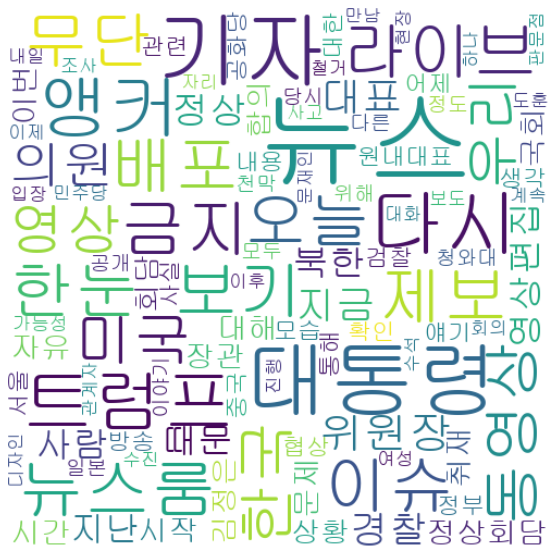

In [52]:
wordcloud = WordCloud(max_font_size=100, 
                      min_font_size = 5,
                      width=500, 
                      height=500, 
                      background_color='white', 
                      prefer_horizontal = 0.9999, # 단어의 수평 표시 비율
                      font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 워드클라우드 백그라운 이미지 적용하기

In [67]:
import numpy as np
from wordcloud import ImageColorGenerator
from PIL import Image

korea_coloring = np.array(Image.open("image_korea.png"))
image_colors = ImageColorGenerator(korea_coloring)

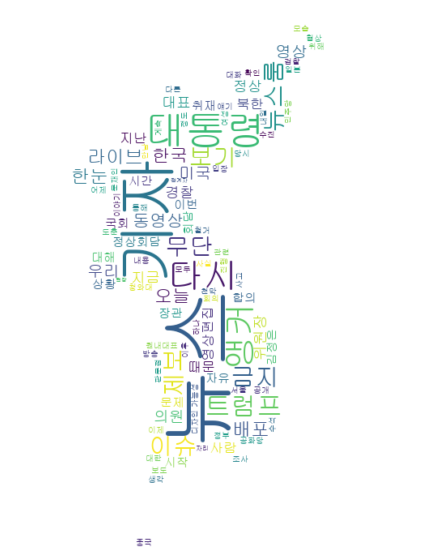

In [68]:
wordcloud = WordCloud(max_font_size=100, 
                      min_font_size = 5,
                      width=500, 
                      height=500, 
                      mask=korea_coloring, # 배경 이미지 마스크
                      background_color='white', 
                      prefer_horizontal = 0.9999, # 단어의 수평 표시 비율
                      font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [256]:
# 이미지 파일로 저장
fig.savefig("wordcloud_image.png")

### 데이터 전처리

In [257]:
df['contents'] = df['contents'].map(lambda x : x.replace('\n \n', '\n').replace('\n \n', '\n'))
df['contents'] = df['contents'].map(lambda x : x.replace('동영상 뉴스\n', ''))
df['contents'] = df['contents'].map(lambda x : x.replace('무단 전재 및 재배포 금지',''))
df['contents'] = df['contents'].map(lambda x : x.replace('[저작권자(c) MBC (www.imnews.com) 무단복제 재배포 금지]',''))
df['contents'] = df['contents'].map(lambda x : x.replace('Copyright(c) Since 1996, MBC&iMBC All rights reserved.',''))
df['contents'] = df['contents'].map(lambda x : x.replace('[저작권자(c) MBC (http://imnews.imbc.com) 무단복제 재배포 금지]',''))
df['contents'] = df['contents'].map(lambda x : x.replace('Copyright by JTBC(http://jtbc.joins.com) and JTBC Content Hub Co., Ltd. All Rights Reserved.',''))
df['contents'] = df['contents'].map(lambda x : x.replace('※ ⓒ SBS & SBS Digital News Lab. : 무단복제 및 재배포 금지',''))
df['contents'] = df['contents'].map(lambda x : x.replace('■ 인터뷰의 저작권은 JTBC 뉴스에 있습니다. 인용보도 시 출처를 밝혀주시기 바랍니다.\n ■ 방송 : JTBC 뉴스룸 (20:00~21:20) / 진행 : 김필규\n ',''))

In [258]:
# 정규표현식을 이용한 데이터 전처리
import re
df['contents'] = df['contents'].map(lambda x : re.sub('▶.*(\\n)', '', x))
df['contents'] = df['contents'].map(lambda x : re.sub('▶.*$', '', x))
df['contents'] = df['contents'].map(lambda x : re.sub('\[ https\://news\.sbs\.co\.kr/n/\?id\=N[0-9].* \]','',x).strip())

In [1]:
df['contents'] = df['contents'].map(lambda x : x.replace('\n \n', '\n').replace('\n \n', '\n'))

NameError: name 'df' is not defined

In [ ]:
df.to_csv(.to_csv("./news2009", encoding="ansi")